# Single Layer Neural Network

## Steps:
 - Define Structure
 - initialize parameters
 - Forward Propagation
   $$Z^{[1]} =  W^{[1]} X + b^{[1]} $$ 
   $$A^{[1]} = \tanh(Z^{[1]}) $$
   $$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} $$
   $$\hat{Y} = A^{[2]} = \sigma(Z^{[2]}) $$


 - compute cost
    - $$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(\hat{y}^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- \hat{y}^{[2] (i)}\right) \large{)} \small $$
 - Backward Propagation
  ---------------------------------------------------------------------
  $$dZ^{[2]} =  A^{[2]} - Y  $$ 
  $$dW^{[2]} = \frac {1} {m} dZ^{[2]} A^{[1]T}  $$
  $$db^{[2]} = \frac {1} {m} \sum\limits_{i = 1}^{m} dZ^{[2]}  $$
  ---------------------------------------------------------------------
  $$dW^{[2]} = \frac {1} {m} dZ^{[2]} A^{[1]T}  $$
  $$dZ^{[2]} = W^{[2]} A^{[1]} + b^{[2]} $$
  $$\hat{Y} = A^{[2]} = \sigma(Z^{[2]}) $$
 - update weights

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
tf.random.set_seed(33)


## Defining Structure and initializing parameters

In [3]:
def parameters_initializer(input_dim: int, hidden_dim: int, output_dim: int):
    W1 = tf.random.normal([hidden_dim, input_dim], dtype=tf.float64)
    b1 = tf.zeros([hidden_dim, 1], dtype=tf.float64)
    W2 = tf.random.normal([output_dim, hidden_dim], dtype=tf.float64)
    b2 = tf.zeros([output_dim, 1], dtype=tf.float64)
    parameters = {
        'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2
    }
    return parameters


In [4]:
params = parameters_initializer(2, 4, 1)
params


{'W1': <tf.Tensor: shape=(4, 2), dtype=float64, numpy=
 array([[ 0.66724593,  0.6416387 ],
        [ 1.10669007,  0.842583  ],
        [ 1.7161246 , -2.81539924],
        [-0.49222419, -0.53460197]])>,
 'b1': <tf.Tensor: shape=(4, 1), dtype=float64, numpy=
 array([[0.],
        [0.],
        [0.],
        [0.]])>,
 'W2': <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[-0.97562285,  1.54872505,  1.79938454, -0.41321412]])>,
 'b2': <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.]])>}

## forward propagation
---------------------------------------
   $$Z^{[1]} =  W^{[1]} X + b^{[1]} $$ 
   $$A^{[1]} = \tanh(Z^{[1]}) $$
   $$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} $$
   $$\hat{Y} = A^{[2]} = \sigma(Z^{[2]}) $$


In [5]:
def forward_propagation(X: tf.Tensor, params: dict[str, tf.Tensor]):
    W1, b1, W2, b2 = params.values()
    Z1 = tf.tensordot(W1, X, axes=1) + b1
    A1 = tf.nn.tanh(Z1)
    Z2 = tf.tensordot(W2, A1, axes=1) + b2
    A2 = tf.nn.sigmoid(Z2)
    state = {
        'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2
    }
    return state, A2


In [6]:
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
outs, A2 = forward_propagation(X, params)
outs


{'Z1': <tf.Tensor: shape=(4, 3), dtype=float64, numpy=
 array([[ 2.59216203, -1.01367251, -2.72048977],
        [ 3.63443905, -1.79208863, -3.80295565],
        [-6.73007312, -4.83994881,  7.29315297],
        [-2.09603009,  0.7171474 ,  2.20295048]])>,
 'A1': <tf.Tensor: shape=(4, 3), dtype=float64, numpy=
 array([[ 0.98885501, -0.76727673, -0.99136696],
        [ 0.99860718, -0.94598056, -0.99900549],
        [-0.99999715, -0.99987495,  0.99999907],
        [-0.9702199 ,  0.61513923,  0.97588413]])>,
 'Z2': <tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[-0.81665242, -2.76983482,  0.8161492 ]])>,
 'A2': <tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.30647472, 0.05897618, 0.69341831]])>}

## Back Propagation

In [7]:
def back_propagation(parameters: dict, state: dict, X: tf.Tensor, Y: tf.Tensor):
    W1, b1, W2, b2 = parameters.values()
    Z1, A1, Z2, A2 = state.values()
    m = X.shape[1]
    # Gradients
    dZ2 = A2 - Y
    dW2 = (1/m) * tf.tensordot(dZ2, tf.transpose(A1), axes=1)
    db2 = (1/m) * tf.reduce_sum(dZ2, axis=1, keepdims=True)
    dZ1 = tf.tensordot(tf.transpose(W2), dZ2, axes=1) * (1 - tf.pow(A1, 2))
    dW1 = (1/m) * tf.tensordot(dZ1, tf.transpose(X), axes=1)
    db1 = (1/m) * tf.reduce_sum(dZ1, axis=1, keepdims=True)
    grads = {
        'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2
    }
    return grads


In [8]:
state, A2 = forward_propagation(X, params)
back_propagation(params, state, X, Y)

{'dW1': <tf.Tensor: shape=(4, 2), dtype=float64, numpy=
 array([[-2.42854369e-01,  9.03360873e-02],
        [ 1.00426159e-01, -3.08008253e-02],
        [ 2.79157775e-04, -8.01598812e-05],
        [-1.50982225e-01,  7.16622224e-02]])>,
 'db1': <tf.Tensor: shape=(4, 1), dtype=float64, numpy=
 array([[ 0.12698769],
        [-0.0513522 ],
        [-0.00014275],
        [ 0.08162272]])>,
 'dW2': <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[-0.21706742, -0.1650326 ,  0.77594904,  0.25690243]])>,
 'db2': <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-0.31371026]])>}

## Update Parameters:
$$ w1 = w1 - {\alpha} * \frac{\partial J}{\partial w1} $$
$$ b1 = b1- {\alpha}  * \frac{\partial J}{\partial b1} $$
$$ w2 = w2 - {\alpha} * \frac{\partial J}{\partial w2} $$
$$ b2 = b2- {\alpha}  * \frac{\partial J}{\partial b2} $$

In [9]:
def state_update(parameters: dict, grads: dict, learning_rate=0.9):
    W1, b1, W2, b2 = parameters.values()
    dW1, db1, dW2, db2 = grads.values()
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return dict(W1=W1, b1=b1, W2=W2, b2=b2)


In [10]:
state, A2 = forward_propagation(X, params)
grads = back_propagation(params, state, X, Y)
state_update(params, grads)

{'W1': <tf.Tensor: shape=(4, 2), dtype=float64, numpy=
 array([[ 0.88581486,  0.56033622],
        [ 1.01630652,  0.87030374],
        [ 1.71587335, -2.8153271 ],
        [-0.35634019, -0.59909797]])>,
 'b1': <tf.Tensor: shape=(4, 1), dtype=float64, numpy=
 array([[-0.11428892],
        [ 0.04621698],
        [ 0.00012848],
        [-0.07346044]])>,
 'W2': <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[-0.78026217,  1.69725438,  1.1010304 , -0.6444263 ]])>,
 'b2': <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.28233924]])>}

## Merging All

In [11]:
class SingleLayerNN:
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int, learning_rate=0.09):
        self.params = parameters_initializer(input_dim, hidden_dim, output_dim)
        self.state = dict()
        self.grads = dict()
        self.costs = []
        self.learning_rate = learning_rate
        self.performace = []

    def parameters_initializer(input_dim: int, hidden_dim: int, output_dim: int):
        W1 = tf.random.normal([hidden_dim, input_dim], dtYpe=tf.float64)
        b1 = tf.zeros([hidden_dim, 1], dtYpe=tf.float64)
        W2 = tf.random.normal([output_dim, hidden_dim], dtYpe=tf.float64)
        b2 = tf.zeros([output_dim, 1], dtYpe=tf.float64)
        params = {
            'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2
        }
        return params

    def forward_propagation(self, X: tf.Tensor):
        W1, b1, W2, b2 = self.params.values()
        Z1 = tf.tensordot(W1, X, axes=1) + b1
        A1 = tf.nn.tanh(Z1)
        Z2 = tf.tensordot(W2, A1, axes=1) + b2
        A2 = tf.nn.sigmoid(Z2)
        state = {
            'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2
        }
        return state, A2

    def back_propagation(self, X: tf.Tensor, Y: tf.Tensor):
        W1, b1, W2, b2 = self.params.values()
        Z1, A1, Z2, A2 = self.state.values()
        m = X.shape[1]
        # Gradients
        dZ2 = A2 - Y
        dW2 = (1/m) * tf.tensordot(dZ2, tf.transpose(A1), axes=1)
        db2 = (1/m) * tf.reduce_sum(dZ2, axis=1, keepdims=True)
        dZ1 = tf.tensordot(tf.transpose(W2), dZ2, axes=1) * (1 - tf.pow(A1, 2))
        dW1 = (1/m) * tf.tensordot(dZ1, tf.transpose(X), axes=1)
        db1 = (1/m) * tf.reduce_sum(dZ1, axis=1, keepdims=True)
        grads = {
            'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2
        }
        return grads

    def state_update(self):
        W1, b1, W2, b2 = self.params.values()
        dW1, db1, dW2, db2 = self.grads.values()
        W1 = W1 - self.learning_rate * dW1
        b1 = b1 - self.learning_rate * db1
        W2 = W2 - self.learning_rate * dW2
        b2 = b2 - self.learning_rate * db2
        return dict(W1=W1, b1=b1, W2=W2, b2=b2)

    def compute_cost(self, Y: tf.Tensor, Yhat: tf.Tensor):
        loss = tf.reduce_sum((Y * tf.math.log(Yhat)) +
                             ((1-Y) * tf.math.log(1-Yhat)))
        cost = (-1/Y.shape[0]) * loss
        return float(tf.squeeze(cost))

    def optimize(self, X: tf.Tensor, Y: tf.Tensor, validation: tuple, epochs=100):
        m = X.shape[1]
        for epoch in range(epochs):
            self.state, A2 = self.forward_propagation(X)
            self.grads = self.back_propagation(X, Y)
            self.params = self.state_update()
            cost = self.compute_cost(Y, A2)
            self.costs.append(cost)
            if epoch % 10 == 0:
                y_train_pred = self.predict(X)
                y_test_pred = self.predict(validation[0])
                train_acc = 100 - np.mean(np.abs(y_train_pred - Y)) * 100
                test_acc = 100 - \
                    np.mean(np.abs(y_test_pred - validation[1])) * 100
                self.performace.append([train_acc, test_acc])
                print(
                    f"epoch: {epoch} || Cost: {cost: .5f} || Train Accuracy: {train_acc: .2f}% || Test Accuracy: {test_acc:.2f}%")
        return np.array(self.performace)

    def predict(self, X: tf.Tensor):
        _, A2 = self.forward_propagation(X)
        return tf.round(A2)


In [12]:
Xv = np.array([[1., -1.8, -1.5], [3.1, 1.5, -3.2]])
Yv = np.array([[1, 1, 0]])
nn = SingleLayerNN(2, 4, 1)
nn.optimize(X, Y,validation=(Xv,Yv), epochs=100)

epoch: 0 || Cost:  2.04711 || Train Accuracy:  33.33% || Test Accuracy: 33.33%
epoch: 10 || Cost:  0.77332 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 20 || Cost:  0.47288 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 30 || Cost:  0.33659 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 40 || Cost:  0.25984 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 50 || Cost:  0.21099 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 60 || Cost:  0.17731 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 70 || Cost:  0.15276 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 80 || Cost:  0.13409 || Train Accuracy:  100.00% || Test Accuracy: 100.00%
epoch: 90 || Cost:  0.11943 || Train Accuracy:  100.00% || Test Accuracy: 100.00%


array([[ 33.33333333,  33.33333333],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ]])

In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
x, y = datasets.load_breast_cancer(return_X_y=True)
x = StandardScaler().fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, random_state=33, test_size=0.3
)
xtrain = tf.Variable(xtrain.T, dtype=tf.float64)
xtest = tf.Variable(xtest.T, dtype=tf.float64)


In [15]:
nn2 = SingleLayerNN(30, 4, 1)
acc = nn2.optimize(xtrain, ytrain,validation=(xtest, ytest), epochs=2000)

epoch: 0 || Cost:  1.86479 || Train Accuracy:  35.68% || Test Accuracy: 25.73%
epoch: 10 || Cost:  0.76683 || Train Accuracy:  63.82% || Test Accuracy: 58.48%
epoch: 20 || Cost:  0.40012 || Train Accuracy:  78.89% || Test Accuracy: 77.19%
epoch: 30 || Cost:  0.29575 || Train Accuracy:  84.67% || Test Accuracy: 84.21%
epoch: 40 || Cost:  0.24896 || Train Accuracy:  87.69% || Test Accuracy: 88.30%
epoch: 50 || Cost:  0.21486 || Train Accuracy:  90.20% || Test Accuracy: 89.47%
epoch: 60 || Cost:  0.19451 || Train Accuracy:  91.21% || Test Accuracy: 90.64%
epoch: 70 || Cost:  0.18173 || Train Accuracy:  91.46% || Test Accuracy: 90.64%
epoch: 80 || Cost:  0.17232 || Train Accuracy:  91.96% || Test Accuracy: 90.64%
epoch: 90 || Cost:  0.16486 || Train Accuracy:  92.71% || Test Accuracy: 90.64%
epoch: 100 || Cost:  0.15859 || Train Accuracy:  92.96% || Test Accuracy: 91.23%
epoch: 110 || Cost:  0.15311 || Train Accuracy:  93.72% || Test Accuracy: 91.23%
epoch: 120 || Cost:  0.14821 || Train A

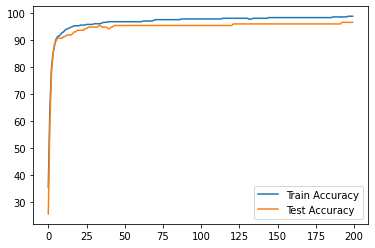

In [16]:
plt.plot(acc[:, 0], label='Train Accuracy')
plt.plot(acc[:, 1], label='Test Accuracy')
plt.legend()
plt.show()